In [75]:
from scipy.stats import expon
from scipy import special
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from scipy.stats import t

def CrawfordTest(case, controls):
    """ Implementation of Crawford and Howell (1998; The Clinical Neuropsychologist) test to compare an individual to a sample.

    Args:
      case : score of the individual
      controls : scores of from a sample group

    Return:
      the one-tail probability associated to the score 'case' compared to the scores in the list 'controls'
    """

    tobs = (case - np.mean(controls)) / np.std(controls, ddof=1)
    return t.cdf(tobs, len(controls) - 1)

#need to calculate real percentages off of this info instead of what we are already using
#what percentile does GPT answer in for each one?

In [62]:
#import and create cleaned stimuli strings which can be copied directly into GPT if desired
#find difference score between human ratings (Graves 2013) and GPTv3.5 (March 14)

home_direct = 'C:/Users/Nick/Downloads/meat-kangaroo-main/'

all_words_and_measures = pd.read_csv(home_direct + 'graves_with_vecs.csv', skipinitialspace=True, )
all_words_and_measures = all_words_and_measures.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

all_words_and_measures['Humans Binary'] = np.where(
    all_words_and_measures['Humans Continuous'] >= 2.5, 'Makes Sense', np.where(
    all_words_and_measures['Humans Continuous'] <= 1.5, 'Nonsense', 'Ambiguous'))

#all_words_and_measures['Stim'] = 'the ' + all_words_and_measures['Stim'].str.replace('-', ' ') + '.'
all_words_and_measures['Difference Score'] = abs(all_words_and_measures['Humans Continuous'] - all_words_and_measures['GPT Continuous Temp 0'])

all_words_and_measures_short = all_words_and_measures.head(10)

# all_words_and_measures.to_excel('cleaned_words.xlsx')

the dog puppy. 0.9966523579221718


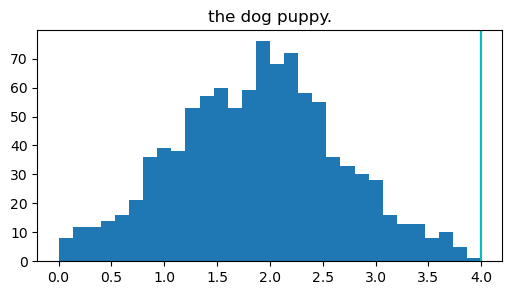

the baby teeth. 1.7210375903742018e-13


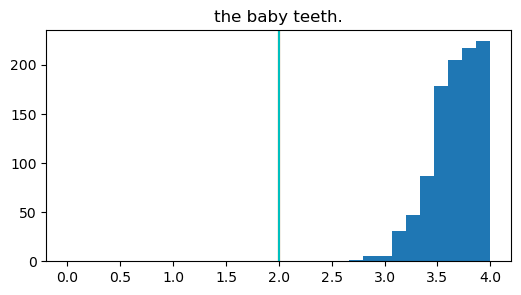

the dress summer. 0.8648364350673138


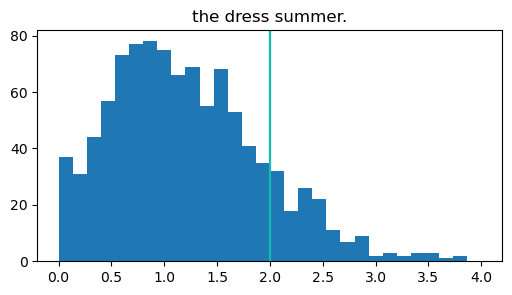

the boot car. 0.9747081212572066


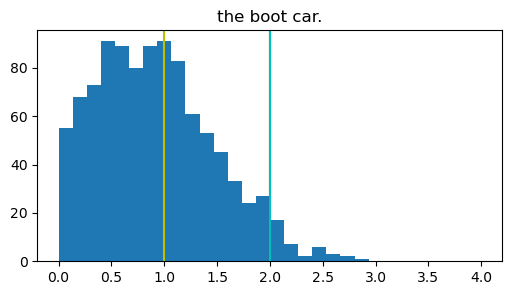

the pig truck. 0.5191618099964289


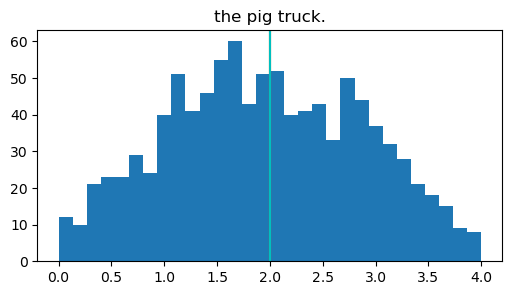

the boy cabin. 0.9939107387956218


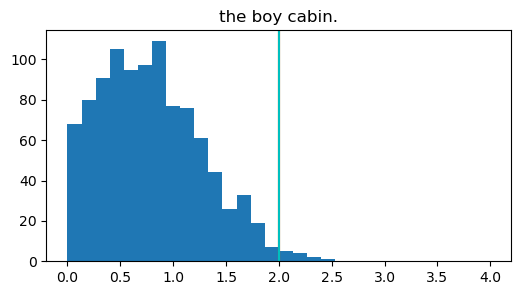

the heart guy. 0.9259075600184279


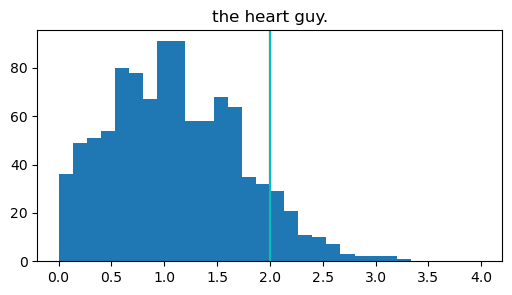

the helmet mirror. 0.6892026952973003


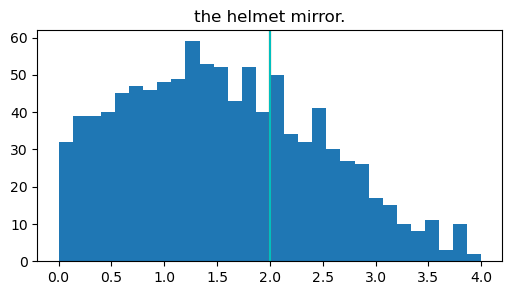

the field square. 0.7538273975707762


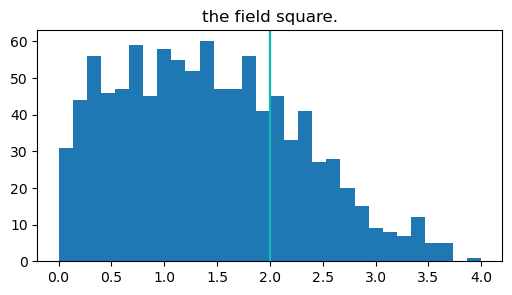

the pen pig. 0.8539563100520987


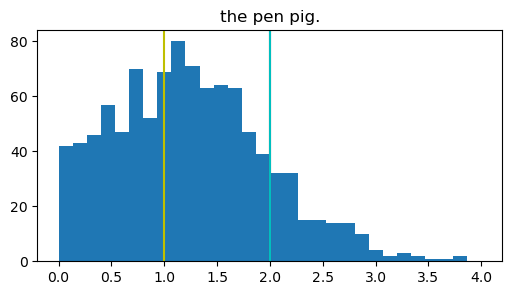

In [77]:
min_value = 0
max_value = 4

for index, row in all_words_and_measures.iterrows():
    mean = row['Humans Continuous']
    std = row['SD']
    
    if std == 0:
        min_in_standard_domain = (min_value - mean)
        max_in_standard_domain = (max_value - mean)
    else:
        min_in_standard_domain = (min_value - mean) / std
        max_in_standard_domain = (max_value - mean) / std
    
    min_in_erf_domain = special.erf(min_in_standard_domain)
    max_in_erf_domain = special.erf(max_in_standard_domain)
    
    random_uniform_data = np.random.uniform(min_in_erf_domain, max_in_erf_domain, 1000)
    random_gaussianized_data = (special.erfinv(random_uniform_data) * std) + mean
    
    CrawfordTest(row['GPT Continuous Temp 0'], random_gaussianized_data)
    print(row[0], CrawfordTest(row['GPT Continuous Temp 0'], random_gaussianized_data))
    
    fig, axes = plt.subplots(1, 1, figsize=(6, 3))
    axes.hist(random_gaussianized_data, 30, range=(0,4))
    axes.set_title(row[0])
    plt.axvline(x=row['GPT Continuous Temp 0'], color='r')
    plt.axvline(x=row['GPT Continuous Temp .5'], color='y')
    plt.axvline(x=row['GPT Continuous Temp 1'], color='c')
#    plt.savefig(row[0]+'.png')
    plt.show()

In [ ]:
test_array = 

<class 'numpy.ndarray'>
2.0551203430380913


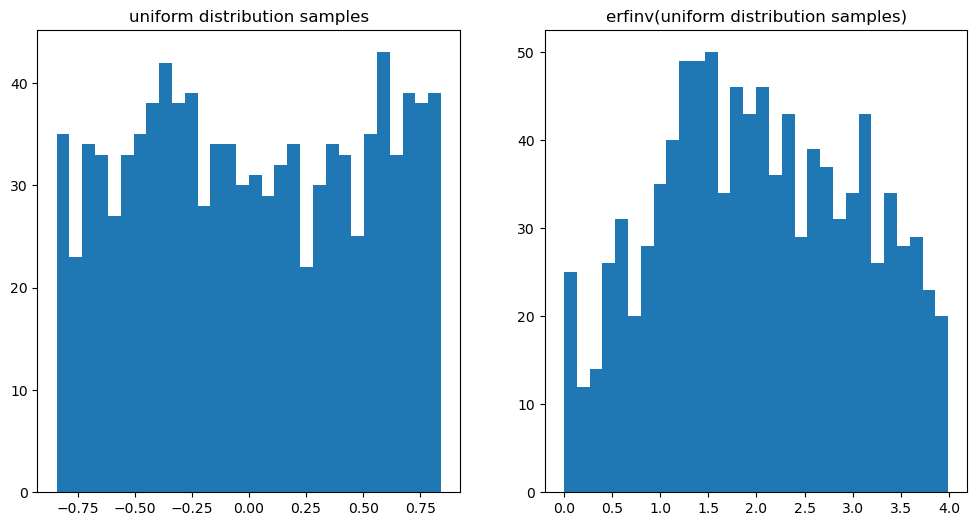

In [35]:
min_value = 0
max_value = 4

all_words_and_measures['Distribution'] = 


min_in_standard_domain = (min_value - mean) / std
max_in_standard_domain = (max_value - mean) / std

min_in_erf_domain = special.erf(min_in_standard_domain)
max_in_erf_domain = special.erf(max_in_standard_domain)

random_uniform_data = np.random.uniform(min_in_erf_domain, max_in_erf_domain, 1000)
random_gaussianized_data = (special.erfinv(random_uniform_data) * std) + mean

print(type(random_gaussianized_data))

x=random.choice(random_gaussianized_data)

print(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(random_uniform_data, 30)
axes[1].hist(random_gaussianized_data, 30)
axes[0].set_title('uniform distribution samples')
axes[1].set_title('erfinv(uniform distribution samples)')
plt.show()

C:\Users\Nick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

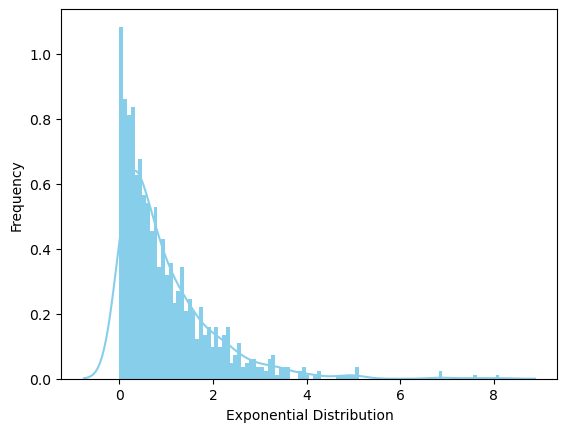

In [3]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)

ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')